# Computational Physics U24568
## Lecture 3b - Class Conundrums

### Introduction

Today's lecture will give you an introduction to classes in python, and explain why python is known as an "object oriented" language. The basic idea is that when writing a long piece of code you normally want to split things up using functions to avoid repeating code and to keep the main block of code short and concise, while also making it clear what is going on.

The class provides an alternative to using functions. A class defines an object, which might hold a number of attributes (think values) or methods (think functions, which act on the class) describing that object. You can then use these attributes and methods to set up the object in the way you want and then use this to solve problems.

As an abstract example of this, if I were simulating a Galaxy I might want to use a class as a nice way to turn features on and off. This might be accessed with code looking something like:

```python
my_galaxy = GalaxySimulator(num_stars=1E9)
my_galaxy.add_supermassive_blackhole(mass=1E6)
my_galaxy.add_satellite_galaxies(50)
my_galaxy.add_star_forming_region(location_from_center_kpc=(10,10,1), radius_kpc=1)
my_galaxy.evolve_galaxy(time_gigayears=10)
```

Now if you copy this code into the window it isn't going to work, as we haven't written the code to do this, but I hope the methods being used here give some idea of what these commands are doing (even if the details are not clear).

In this lecture we'll walk through the details of defining your own class, giving the usual set of exercises to practice on.


### Initializing a class

The very first thing we need to know is how to create a basic class. A simple class that does nothing at all can be defined as

In [ ]:
class MyPointlessClass:
    pass

We can then generate an "instance" of this class by running:

In [ ]:
mypointlessclass_instance = MyPointlessClass()

We can examine this instance to see what it is:

In [ ]:
print(type(mypointlessclass_instance))

It's an example of the MyPointlessClass object, as expected.

We can set values into this object, and do arithmetic using them. Note the "." operator is used here to access
attributes (or methods, which we'll come to in a bit!) of an object (or instance of a class).

In [ ]:
mypointlessclass_instance.value1 = 10.
mypointlessclass_instance.value2 = 20.
mypointlessclass_instance.value3 = mypointlessclass_instance.value1 + mypointlessclass_instance.value2

In this example we're basically using the object as a "namespace". We're storing values into the class instance, if the class instance is storing lots of different values then the class instance could be sent on to functions to avoid sending lots of values as arguments to the function. This can be convenient, but a dictionary (for example) could be used for exactly the same thing.

The power and utility of python's classes come from having as much code as possible exist within the class. So let's introduce some more concepts to illustrate this. First the `__init__` method is used to create a class, which already has certain values. So if we want to demand that a class is initialized with `value1` and `value2` attributes we could do:

In [ ]:
class MyPointlessClass2:
    def __init__(self, value1, value2):
        self.value1 = value1
        self.value2 = value2

The `__init__` method is crucial for using classes effectively! Note that the first argument to `__init__` is `self`. This is a convention. `self` refers to the class instance itself and is *not* provided when calling this function. Effectively `self` here is equivalent to `mypointlessclass_instance` in the case above. So to illustrate calling this:

In [ ]:
mypointlessclass2_instance = MyPointlessClass2(10, 20)
print(mypointlessclass2_instance.value1)
print(mypointlessclass2_instance.value2)

# We can still do:
mypointlessclass2_instance.value3 = mypointlessclass2_instance.value1 + mypointlessclass2_instance.value2
print(mypointlessclass2_instance.value3)

# And we can still change these values:
mypointlessclass2_instance.value2 = 35.
print(mypointlessclass2_instance.value2)
# Of course value 3 is not linked to value2, so won't change automatically:
print(mypointlessclass2_instance.value3)
# But of course you can set it again:
mypointlessclass2_instance.value3 = mypointlessclass2_instance.value1 + mypointlessclass2_instance.value2

Again though, we can consign all of this to the class itself, and define a method for setting this value3

In [ ]:
class MyPointlessClass3:
    def __init__(self, value1, value2):
        self.value1 = value1
        self.value2 = value2
    
    def set_value3(self):
        self.value3 = self.value1 + self.value2

In [ ]:
mypointlessclass3_instance = MyPointlessClass3(10, 20)
mypointlessclass3_instance.set_value3()

Finally, if you always want value3 set, you can have this done automatically. You can also add functions for setting value1 and value2. In the case below these functions *also* call set_value3 whenever you set value1 or value2, so everything is kept in sync automatically!

(I note that python provides "class setters/getters" which can make the example below a little shorter. See here for reference (https://www.python-course.eu/python3_properties.php), but I won't cover this here as we need to be more familiar with classes before thinking about some of the advanced features!)

In [ ]:
class MyPointlessClass4:
    def __init__(self, value1, value2):
        self.value1 = value1
        self.value2 = value2
        self.set_value3()
        
    def set_value1(self, value):
        self.value1 = value
        self.set_value3()

    def set_value2(self, value):
        self.value2 = value
        self.set_value3()
    
    def set_value3(self):
        self.value3 = self.value1 + self.value2

In [ ]:
mypointlessclass4_instance = MyPointlessClass4(10, 20)
# Now value 3 is set automatically:
print(mypointlessclass4_instance.value3)

# And if I do:
mypointlessclass4_instance.set_value1(15)
mypointlessclass4_instance.set_value2(5)
# value3 is updated automatically
print(mypointlessclass4_instance.value1,mypointlessclass4_instance.value2,mypointlessclass4_instance.value3)

# BUT if I do:
mypointlessclass4_instance.value1 = 100
# value3 is *not* updated (the getter/setter thing is the way to avoid this!)
print(mypointlessclass4_instance.value3)


**EXERCISE** Write a class that is initialized with 3 values (`value1`, `value2` and `value3`). It should also include a function that computes

`value4` = (`value1` * `value2`) % `value3`

* STEP 1: Write an `__init__` function that takes 3 inputs, and stores them in the class instance (just like the example above, but with 3, instead of 2, inputs).
* STEP 2: Write a set_value4 function (called a "method") to set value4. This must be within the class definition, similar to the example above.
* STEP 3: Optionally, write set_value1, set_value2 and set_value3 functions, which would update valueX *and then* also update value4 by calling set_value4. 

In [ ]:
class ExerciseClassOne:
    def __init__(self, value1, value2, value3):
        self.value1 = value1
        self.value2 = value2
        self.value3 = value3
        self.compute_value_four()
    
    def compute_value_four(self):
        self.value4 = (self.value1 * self.value2) % self.value3


In [ ]:
# Code to check your class is working

exercise_instance_a = ExerciseClassOne(5, 10, 6)
exercise_instance_a.compute_value_four()
print(exercise_instance_a.value4, "This should be:", (5*10) % 6)

exercise_instance_b = ExerciseClassOne(10, 72, 3.4)
exercise_instance_b.compute_value_four()
print(exercise_instance_b.value4, "This should be:", (10*72) % 3.4)



2 This should be: 2
2.6000000000000187 This should be: 2.6000000000000187


### Optional arguments

Sometimes it is useful to have these arguments take default values. If we take our example above, we can set this up so that these two values take default values:

In [ ]:
class MyPointlessClass5:
    def __init__(self, value1=10, value2=20):
        self.value1 = value1
        self.value2 = value2
        self.set_value3()
        
    def set_value1(self, value):
        self.value1 = value
        self.set_value3()

    def set_value2(self, value):
        self.value2 = value
        self.set_value3()
    
    def set_value3(self):
        self.value3 = self.value1 + self.value2

In [ ]:
# Now if I initialize the class without any values:
mypc_instance5 = MyPointlessClass5()
# It has the default values
print(mypc_instance5.value1, mypc_instance5.value2, mypc_instance5.value3)
print()

# Or I can set one of the values directly:
mypc_instance5 = MyPointlessClass5(value2=15)
print(mypc_instance5.value1, mypc_instance5.value2, mypc_instance5.value3)
print()

# Or I can set the other
mypc_instance5 = MyPointlessClass5(value1=-2)
print(mypc_instance5.value1, mypc_instance5.value2, mypc_instance5.value3)
print()

# Or I can set both
mypc_instance5 = MyPointlessClass5(value1=-2, value2=15)
print(mypc_instance5.value1, mypc_instance5.value2, mypc_instance5.value3)
print()


Okay: let's try a few examples:

**EXERCISE** I want to know how many people have passed my course in the last 5 years. I know that $N$ people passed my course in years 1 - 4, and I have a list $mark\_list$ of marks for the students in year 5. A mark of 40 or larger is pass. Implement a class below so that the code fragment below will tell me how many students have passed my course in the last 5 years.

The class should have the following:

* It should be called `MarkTracker`
* It should have an `__init__` function/method, which takes one input (in addition to `self`). This input is a number N, denoting the number of people who passed the course in the first 4 years. This number should be stored to an attribute of the class called `num_passes`.
* It should have a `add_passes_from_grades` function/method. This takes one input (in addition to `self`). That input is a list of the marks for the students in year 5. The function should identify how many of these students have passed (40 or larger is a pass), and then add that number to the current value of `num_passes`

In [ ]:
class MarkTracker:
    
    def __init__(self, num):
        self.num_passes = num
    
    def add_passes_from_grades(self, mark_list):
        self.num_passes += len([m for m in mark_list if m >= 40])


# DO NOT CHANGE CODE BELOW! It checks if your solution is correct!

N = 52
mark_list = [12, 24, 36, 48, 60, 72, 84, 96]
mark_tracker = MarkTracker(N)
mark_tracker.add_passes_from_grades(mark_list)
print(mark_tracker.num_passes, "Should say 57")

N = 4
mark_list = [35,36,37,38,39,40,41,42,43,44,45]
mark_tracker = MarkTracker(N)
mark_tracker.add_passes_from_grades(mark_list)
print(mark_tracker.num_passes, "Should say 10")

N = 101
mark_list = [1, 12, 40, 91, 36, 40, 23, 27, 42, 68]
mark_tracker = MarkTracker(N)
mark_tracker.add_passes_from_grades(mark_list)
print(mark_tracker.num_passes, "Should say 106")


57 Should say 57
10 Should say 10
106 Should say 106


**EXERCISE** I want to write a class that will compute the area of a rectangle and print it in a nice way. I have implemented part of the solution already. Please fill in the missing method of the class! Note that in this exercise I am defining a `__str__` method. This method is called when I run the builtin `str` function on the class instance. I can overwrite *any* operation in python in this way. I can use `__mul__` to define what to do if I multiply this object with something else, or `__geq__` to define what to do if using the `>=` operator or .... (there's a lot of these "magic methods" https://rszalski.github.io/magicmethods/)

* To solve this you will need to add a compute_area method of this class, which uses the height and width attributes, already defined within the class instance to compute an area. Therefore `compute_area` takes no inputs (other than self) and returns an area, using height and width already defined in the `__init__` method.

In [ ]:
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width

    def __str__(self):
        return 'AREA = {} x {} = {}'.format(self.height, self.width, self.compute_area())

    # FILL IN THE compute_area METHOD HERE
    def compute_area(self):
        return self.height * self.width


# Test if your class works
height=30
width = 21
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 30*21)

height= 0
width = 12
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 0)

height= 12.3
width = 13.4
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 12.3 * 13.4)


AREA = 30 x 21 = 630 Should be 630
AREA = 0 x 12 = 0 Should be 0
AREA = 12.3 x 13.4 = 164.82000000000002 Should be 164.82000000000002


**EXERCISE** Now take the above example and add an additional method such that when I run `str` on the class instance it prints both the area *and* the perimeter.

* HINT: To do this I would write a `compute_perimeter` method, similar to `compute_area`. Then the `__str__` method needs to be edited to return a string that prints both the area and perimeter!

In [ ]:
# FILL IN CLASS HERE
class Rectangle:
    def __init__(self, height, width):
        self.height = height
        self.width = width

    def __str__(self):
        return 'AREA = {} x {} = {};  '.format(self.height, self.width, self.compute_area(),) + \
               'PERIMETER = 2 * ({} + {}) = {}'.format(self.height, self.width, self.compute_perimeter(),)

    def compute_area(self):
        return self.height * self.width
    
    def compute_perimeter(self):
        return 2 * self.height + 2*self.width


# Test if your class works
height=30
width = 21
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 30*21, "and", 2*(30+21))

height= 0
width = 12
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 0, "and ... what should the perimeter be in this case??")

height= 12.3
width = 13.4
rectangle_instance = Rectangle(height, width)
print(str(rectangle_instance), "Should be", 12.3 * 13.4, "and", 2*(12.3 + 13.4))


AREA = 30 x 21 = 630;  PERIMETER = 2 * (30 + 21) = 102 Should be 630 and 102
AREA = 0 x 12 = 0;  PERIMETER = 2 * (0 + 12) = 24 Should be 0 and ... what should the perimeter be in this case??
AREA = 12.3 x 13.4 = 164.82000000000002;  PERIMETER = 2 * (12.3 + 13.4) = 51.400000000000006 Should be 164.82000000000002 and 51.400000000000006


**EXERCISE**: In a similar vein write a Triangle class. This should be able to print the perimeter, and area, of a triangle. It should be initialized by taking the 3 lengths of the sides of the triangle.

* HINT: Here you have some more freedome to define how to do this, but your Triangle class must be called `Triangle`, must have an `__init__` method taking the 3 lengths as input, and define a `__str__` method similar to the case above.

In [ ]:
# Add implementation of a Triangle class here
class Triangle:
    def __init__(self, side1, side2, side3):
        self.side1 = side1
        self.side2 = side2
        self.side3 = side3

    def __str__(self):
        return 'AREA = {};  '.format(self.compute_area(),) + \
               'PERIMETER = {}'.format(self.compute_perimeter(),)

    def compute_area(self):
        s = self.compute_perimeter() / 2.
        return (s * (s-self.side1) * (s-self.side2) * (s-self.side3))**0.5
    
    def compute_perimeter(self):
        return self.side1 + self.side2 + self.side3


# Test if your class works
side1_length = 10
side2_length = 10
side3_length = 10
triangle_instance = Triangle(side1_length, side2_length, side3_length)
print(str(triangle_instance))
print("Should be", 1875**0.5, "and", 30)
print()

side1_length = 10
side2_length = 10
side3_length = 15
triangle_instance = Triangle(side1_length, side2_length, side3_length)
print(str(triangle_instance))
print("Should be", 49.607837082461074, "and", 35)
print()

side1_length = 30
side2_length = 10
side3_length = 21
triangle_instance = Triangle(side1_length, side2_length, side3_length)
print(str(triangle_instance))
print("Should be", 54.49713295211043, "and", 61)
print()


AREA = 43.30127018922193;  PERIMETER = 30
Should be 43.30127018922193 and 30

AREA = 49.607837082461074;  PERIMETER = 35
Should be 49.607837082461074 and 35

AREA = 54.49713295211043;  PERIMETER = 61
Should be 54.49713295211043 and 61



### Recap

So that's the basics of python classes. Just to recap the nomenclature here:

 * Class: Defines a new type of object (like a `float` or an `int` is a type of object)
 * Object or Instance: When I do `mypointlessclass_instance = MyPointlessClass()` then `mypointlessclass_instance` is an *instance* of the `MyPointlessClass` *class*
 * Methods: Are functions defined within the scope of the class, like `compute_area` within our Rectangle class above.
 * Attributes: Are values defined with the class. So things like `mypointlessclass_instance.value1` in our original example.
 
Let's have a look at a couple of other things now, class attributes and inheritance.

First let's consider a class describing a mammal

In [ ]:
class Mammal:
    num_limbs = 4
    has_backbone = True
    warmblooded = True
    
    def __init__(self, current_size, current_age):
        self.current_size = current_size
        self.current_age = current_age

In this example we have defined 3 "class attributes" (`num_limbs`, `has_backbone` and `warmblooded`), these attributes will be accessible from any instance of this class.

In [ ]:
my_mammal = Mammal(100, 32)
print(my_mammal.num_limbs, my_mammal.has_backbone, my_mammal.warmblooded)

If you change these values they will change for *all* instances of the class (don't do this!)

In [ ]:
my_mammal = Mammal(100, 32)
my_mammal2 = Mammal(50, 12)
my_mammal3 = Mammal(25, 64)
Mammal.num_limbs = 3

print(my_mammal.num_limbs, my_mammal2.num_limbs, my_mammal3.num_limbs)

my_mammal = Mammal(100, 32)
my_mammal2 = Mammal(50, 12)
my_mammal3 = Mammal(25, 64)
# This line sets the attribute again to be a local attribute, so this one won't change
my_mammal3.num_limbs = 5
Mammal.num_limbs = 3

print(my_mammal.num_limbs, my_mammal2.num_limbs, my_mammal3.num_limbs)

# Set it back
Mammal.num_limbs = 4

Now let's demonstrate inheritence. If we wanted a canine class, say, we might not want to define again properties of mammals, which are common across all mammals. So we can "inherit" information from the parent class

In [ ]:
class Canine(Mammal):
    num_legs = 4
    lays_eggs = False
    is_carnivore = True

my_canine = Canine(100, 32)

print(my_canine.num_limbs, my_canine.lays_eggs)

In this example the Canine class just adds 3 additional class attributes over the Mammal class. The `__init__` function is "inherited" from the Mammal class and is used directly. If a class method or attribute exists in both the parent and child class, the child class' method or attribute is used

In [ ]:
class Canine(Mammal):
    num_legs = 4
    lays_eggs = False
    is_carnivore = True
    
    def __init__(self, current_size, current_age, is_a_pet=False):
        self.is_a_pet=is_a_pet
        # Explicitly call the parent class' init function
        Mammal.__init__(self, current_size, current_age)
        # A nicer way to do this is:
        # super().__init__(current_size, current_age)

my_canine = Canine(100, 32, is_a_pet=False)

print(my_canine.num_limbs, my_canine.lays_eggs, my_canine.is_a_pet)

Inheritance can have multiple levels. If I wanted a Dog class, I could inherit from the Canine class, which itself inherits from the Mammal class. It's also possible to inherit from multiple classes (`class Class1(Parent1, Parent2, ...):`. 

In [ ]:
class Dog(Canine):
    is_awesome = True
    
    def __init__(self, current_size, current_age):
        # Here I remove the is_pet optional argument as we will just set it to true for all dogs.
        super().__init__(current_size, current_age, is_a_pet=True)

my_dog = Dog(100, 32)

print(my_dog.num_limbs, my_dog.lays_eggs, my_dog.is_a_pet, my_dog.is_awesome)

**EXERCISE** Create a Cat class in the same manner. Define some class attributes specific to a cat. Use a Feline (or Felid) class which is a parent to Cat but a child of Mammal. Again choose some class attributes appropriate in each case. 

In [ ]:
class Felid(Mammal):
    has_claws = True

class Cat(Felid):
    is_spawn_of_satan = True

That's largely it for classes. To see all this in a different way see the python documentation https://docs.python.org/3/tutorial/classes.html

There are some neat features that we aren't going to discuss here, including:

 * Class properties (via getters/setters)
 * Class decorators

(you can Google these if you particularly want to explore these, and I can discuss them if after doing that if things are unclear).

### Exercises 

The best way to properly get to grips with classes is by writing some, so here's some exercises:

**EXERCISE 1** Define a class which has the following methods:
 * get_string: Take a string from console input (use the `input` builtin function)
 * \_\_init\_\_: This should call the get_string method when a class instance is initialized. 
 * print_string: Print the string
 * print_string_upper: Print the string in upper case.
 * print_string_lower: Print the string in lower case.

Test the class with some examples

In [ ]:
class StringStuff():
    def __init__(self):
        self.s = ''
    
    def get_string(self):
        self.s = input()
    
    def print_string(self):
        print(self.s)
    
    def print_string_upper(self):
        print(self.s.upper())
        
    def print_string_lower(self):
        print(self.s.lower())

ex = StringStuff()
ex.get_string()
ex.print_string()
ex.print_string_lower()
ex.print_string_upper()

asdGGHyyHH
asdGGHyyHH
asdgghyyhh
ASDGGHYYHH


**EXERCISE 2** Write a class which is designed to store a population of foxes and chickens. Except the interface here is a bit strange, and you've been asked to design it in the following way. The class must contain:

 * An `__init__` method which takes two arguments `num_heads` and `num_legs`. `num_heads` is the total number of heads including both chickens and foxes. `num_legs` is the total number of legs including both chickens and foxes.
 * A `num_animals` method, which returns the number of chickens and the number of rabbits as a length-2 tuple. (Assume that all chickens have one head and two legs, and all foxes have one head and four legs).
 
Then test initializing the class and calling num_animals. Example outputs you should get:

 * `num_heads=2` and `num_legs=6` -> 1 fox, 1 chicken
 * `num_heads=30` and `num_legs=100` -> 20 foxes, 10 chickens
 * `num_heads=88` and `num_legs=238` -> 31 foxes, 57 chickens
 * `num_heads=5` and `num_legs=64` -> This case is not possible, raise an Exception. (`raise ValueError("MESSAGE")` ... We'll cover error handling later.)

In [ ]:
class AnimalThing():
    def __init__(self, num_heads, num_legs):
        self.num_heads = num_heads
        self.num_legs = num_legs
    
    def num_animals(self):
        # C * 2 + (NH - C) * 4 = NL
        # 4*NH - NL = 2 * C
        if self.num_legs % 1:
            # Odd number of length
            raise ValueError("This combination is not possible")
        
        chickens = (4 * self.num_heads - self.num_legs) / 2
        rabbits = self.num_heads - chickens
        
        if chickens < 0 or rabbits < 0:
            raise ValueError("This combination is not possible")
        
        return rabbits, chickens


at = AnimalThing(2, 6)
print(at.num_animals())

at = AnimalThing(30, 100)
print(at.num_animals())

at = AnimalThing(88, 238)
print(at.num_animals())

at = AnimalThing(5, 64)
print(at.num_animals())


(1.0, 1.0)
(20.0, 10.0)
(31.0, 57.0)


ValueError: ignored

**EXERCISE 3** The last example is an example where the interface doesn't make sense. Why would you give num_heads and num_legs when the obvious thing to count is the number of both animals! Let's try and extend this into a somewhat more challenging example where the benefits of using object oriented programming beging to come into play.

Write a class to track the population of foxes and chickens over time. It should have the following methods:

* An `__init__` method which takes two arguments `num_foxes` and `num_chickens`. These correspond to the *initial* number of foxes and chickens.
* An `add_foxes` method. This should take one argument `num` and when called should increase the number of foxes by `num`. (Maybe the foxes are migrating??)
* An `add_chickens` method. As with `add_foxes` this should take one argument `num` and when called should increase the number of chickens by `num`. (Maybe the chickens migrate as well??)
* An `advance_time_one_year` method. This takes no arguments. When called it simulates how these populations would change over a year. This is done with the following steps. Consider if each of these steps should be individual methods in the class, or just all things that are done in `advance_time_one_year`. These three items should be done *in this order* (so the number of chickens increased in the first item affects the calculation in the third). Where these numbers give fractional numbers of chickens or foxes round *down* to the nearest integer.
  * Increase number of chickens proportionally to chicken population. The number of *additional* chickens is `num_chickens` * 0.6.
  * Decrease number of chickens proportionally to fox population. The number of chickens decreases by `num_foxes` * 4. (This number cannot become less than 0).
  * Change fox population proportionally to chicken *and* fox population. Use the following logic to determine this:
    * If `num_chickens` > `num_foxes` * 4 then add 0.5 * `num_foxes` new foxes.
    * If `num_chickens` > `num_foxes` * 2 then add (((`num_chickens`/`num_foxes`) - 2) * 0.25 * `num_foxes`) new foxes.
    * If `num_chickens` <= `num_foxes` * 2 then reduce the number of foxes by ((2 - (`num_chickens`/`num_foxes`)) * 0.25 * `num_foxes`)
    
Then try the following. Initiate the class with 1000 chickens, and 50 foxes. Evolve and store the population of both animals over 20 years. Plot how the population evolves.

You should find that this is not a stable ecosystem. Is it possible to edit some of the parameters above so that you have a *dynamic* ecosystem (e.g. the populations should change over time and respond to each other) but one that will not result in both sets of animals quickly disappearing, or that will result in an unckecked increase in one population?

In [ ]:
class AnimalThingTwo():
    def __init__(self, num_chickens, num_foxes):
        self.num_chickens = num_chickens
        self.num_foxes = num_foxes
    
    def add_foxes(self, num_foxes):
        self.num_foxes += num_foxes
        if self.num_foxes < 0:
            self.num_foxes = 0 # :-(
        
    def add_chickens(self, num_chickens):
        self.num_chickens += num_chickens
        if self.num_chickens < 0:
            self.num_chickens = 0 # :-(
        
    def advance_time_one_year(self):
        self.add_chickens(int(0.6 * self.num_chickens))
        self.add_chickens(int(- 4 * self.num_foxes))
        if self.num_chickens > self.num_foxes*4:
            self.add_foxes(int(0.5 * self.num_foxes))
        else:
            # Note the second and third conditions are not different, the number just gets negative!
            self.add_foxes(int((self.num_chickens / self.num_foxes - 2) * 0.25 * self.num_foxes))
            
class AnimalThingStable():
    def __init__(self, num_chickens, num_foxes):
        self.num_chickens = num_chickens
        self.num_foxes = num_foxes
    
    def add_foxes(self, num_foxes):
        self.num_foxes += num_foxes
        if self.num_foxes < 0:
            self.num_foxes = 0 # :-(
        
    def add_chickens(self, num_chickens):
        self.num_chickens += num_chickens
        if self.num_chickens < 0:
            self.num_chickens = 0 # :-(
        
    def advance_time_one_year(self):
        # Use this and the populations will disappear:
        # self.add_chickens(int(0.699357903060 * self.num_chickens))
        # Use this and the populations will explode
        self.add_chickens(int(0.699357903070 * self.num_chickens))
        # This really is balanced on a knife-edge. Unless the parameters are *exactly* tuned such systems
        # are not stable. (In reality different/additional controls on the populations are needed to keep this stable).
        self.add_chickens(int(- 4 * self.num_foxes))
        if self.num_chickens > self.num_foxes*4:
            self.add_foxes(int(0.5 * self.num_foxes))
        else:
            # Note the second and third conditions are not different, the number just gets negative!
            self.add_foxes(int((self.num_chickens / self.num_foxes - 2) * 0.25 * self.num_foxes))

Year 0 Chickens: 1400 Foxes: 75
Year 1 Chickens: 1940 Foxes: 112
Year 2 Chickens: 2656 Foxes: 168
Year 3 Chickens: 3577 Foxes: 252
Year 4 Chickens: 4715 Foxes: 378
Year 5 Chickens: 6032 Foxes: 567
Year 6 Chickens: 7383 Foxes: 850
Year 7 Chickens: 8412 Foxes: 1275
Year 8 Chickens: 8359 Foxes: 1912
Year 9 Chickens: 5726 Foxes: 2387
Year 10 Chickens: 0 Foxes: 1194
Year 11 Chickens: 0 Foxes: 597
Year 12 Chickens: 0 Foxes: 299
Year 13 Chickens: 0 Foxes: 150
Year 14 Chickens: 0 Foxes: 75
Year 15 Chickens: 0 Foxes: 38
Year 16 Chickens: 0 Foxes: 19
Year 17 Chickens: 0 Foxes: 10
Year 18 Chickens: 0 Foxes: 5
Year 19 Chickens: 0 Foxes: 3


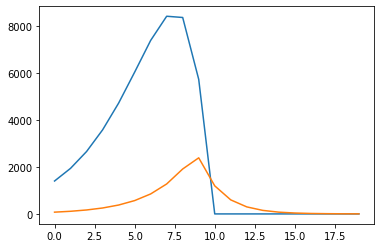

In [ ]:
amt2 = AnimalThingTwo(1000, 50)
n_chickens = []
n_foxes = []

for year in range(20):
    amt2.advance_time_one_year()
    n_chickens.append(amt2.num_chickens)
    n_foxes.append(amt2.num_foxes)
    print("Year", year, "Chickens:", amt2.num_chickens, "Foxes:", amt2.num_foxes)

# You should make the plot look nicer than this and include axis labels etc.!!
from matplotlib import pyplot as plt
plt.plot(n_chickens)
plt.plot(n_foxes)

In [ ]:
# No I can't keep this stable unless I create a system that is *not* dynamic (ie. I tune the parameters)
# so that the populations never change.
amt2 = AnimalThingStable(1000, 50)

for year in range(1000):
    amt2.advance_time_one_year()
print("Year", year, "Chickens:", amt2.num_chickens, "Foxes:", amt2.num_foxes)

Year 999 Chickens: 4597825123782512403940663656402514720920242935922474826237032536983928011004631378740866635851687113426633228031975235399680403353362365895300585782101605744025722279832743083776362925863293098581715396471734876411719962667793132 Foxes: 6135796327505989235727472356078700172383477942443873077356831410729146305162765536350373375775510798599136513330640118502771752673316007056148423671542581521901877597060593139309


**EXERCISE 4**: Challenging exercise. Construct a class that can be used to play a game of noughts and crosses. The class should have at least the following methods:

 * `__init__`: Create an empty 3 x 3 board (represented by some form of list-like object).
 * `place_nought`: Place a nought at a position on the board (the position is given by arguments to this method).
 * `place_cross`: Place a cross at a position on the board (the position is given by arguments to this method).
 * `print_board`: Print a representation of the board to the terminal
 * `restart_game`: Revert to an empty 3 x 3 board
 
Whenever a nought, or a cross, is played, the following should happen:

 * Noughts and crosses must be played in alternating order, if someone tries to play out of order a message should be given, but the game allowed to continue
 * You cannot place a piece on a space that already has a piece on it. Print a message if this happens and continue the game.
 * Whenever a piece is played check to see if one player has won. Print a message if this happens.
 * If all spaces on the board are full and no-one has won, print a message to that effect.

In [ ]:
import numpy
class NoughtsAndCrosses():
    def __init__(self):
        self.board = numpy.zeros([3,3])
        self.current_player = None
    
    def print_board(self):
        for i in range(3):
            curr_line = ''
            for j in range(3):
                if self.board[i,j] == -1:
                    curr_line += "O"
                elif self.board[i,j] == 1:
                    curr_line += "X"
                elif self.board[i,j] == 0:
                    curr_line += "*"
            print(curr_line)
        print()
    
    def place_nought(self, i, j):
        if self.current_player == 'crosses':
            print("It's not nought's turn!")
            return
        if not self.board[i,j] == 0:
            print("That square already has a piece on it")
            return
        self.board[i,j] = -1
        self.current_player = 'crosses'
        self.check_board_status()
    
    def place_cross(self, i, j):
        if self.current_player == 'noughts':
            print("It's not nought's turn!")
            return
        if not self.board[i,j] == 0:
            print("That square already has a piece on it")
            return
        self.board[i,j] = 1
        self.current_player = 'noughts'
        self.check_board_status()
    
    def check_board_status(self):
        # Check horizontal and vertical rows
        diag_sum = self.board[0,0] + self.board[1,1] + self.board[2,2]
        diag_sum2 = self.board[0,2] + self.board[1,1] + self.board[2,0]
        for i in range(3):
            if self.board[i,:].sum() == 3 or self.board[:,i].sum() == 3 or diag_sum == 3 or diag_sum == 3:
                print("CROSSES WIN")
                self.print_board()
            if self.board[i,:].sum() == -3 or self.board[:,i].sum() == -3 or diag_sum == -3 or diag_sum == -3:
                print("NOUGHTS WIN")
                self.print_board()
        
        # Check if any values are 0
        if not (self.board == 0).any():
            print("GAME IS A DRAW")
            self.print_board()    

# Some example games to test. Do not change!
oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(0,1)
# This one below should not go through: It's not nought's turn.
oandc.place_nought(1,1)
oandc.print_board()
oandc.place_cross(1,1)
oandc.place_nought(0,0)
# This shouldn't go through as you can't play a cross on a nought.
oandc.place_cross(0,0)
oandc.place_cross(2,2)
oandc.place_nought(0,2)
# Nought wins

oandc = NoughtsAndCrosses()
oandc.print_board()
oandc.place_nought(1,1)
oandc.place_cross(0,0)
oandc.place_nought(0,2)
oandc.place_cross(2,0)
oandc.place_nought(1,0)
oandc.place_cross(1,2)
oandc.place_nought(0,1)
oandc.place_cross(2,1)
oandc.place_nought(2,2)
# DRAW




***
***
***

It's not nought's turn!
*O*
***
***

That square already has a piece on it
NOUGHTS WIN
OOO
*X*
**X

***
***
***

GAME IS A DRAW
XOO
OOX
XXO



We acknowledge the following resources for help in formulating this notebook:
 * CodeSignal
 * https://github.com/zhiwehu/Python-programming-exercises